## Which game is the oldest and the newest games in that dataset?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dateutil

df = pd.read_csv('./Games Sales.csv')
df.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,12/1/2017,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,11/1/2011,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,5/1/2012,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,11/1/2006,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,5/1/2011,Action-adventure,Re-Logic,Re-Logic


In [2]:
# Add timestamp column
df['Release Datetime'] = df['Release'].apply(lambda x: dateutil.parser.parse(x).timestamp())

### Oldest

In [3]:
df_oldest = df.sort_values('Release Datetime').reset_index(drop=True)
df_oldest[['Name', 'Release']].head(10)

,Name,Release
0,Hydlide,12/1/1984
1,Where in the World Is Carmen Sandiego?,6/1/1985
2,International Karate,11/1/1985
3,Tetris,1/1/1988
4,Last Ninja 2,8/1/1988
5,RoboCop,12/1/1988
6,Populous,6/1/1989
7,Return to Zork,8/1/1993
8,Myst,9/1/1993
9,Star Wars: Rebel Assault,11/1/1993


### Newest

In [4]:
df_newest = df.sort_values('Release Datetime', ascending=False).reset_index(drop=True)
df_newest[['Name', 'Release']].head(10)

,Name,Release
0,Valheim,2/1/2021
1,Cyberpunk 2077,12/1/2020
2,Crusader Kings III,9/1/2020
3,Fall Guys,8/1/2020
4,Mordhau,4/1/2019
5,Satisfactory,3/1/2019
6,The Forest,4/1/2018
7,Kingdom Come: Deliverance,2/1/2018
8,Rust,2/1/2018
9,PlayerUnknown's Battlegrounds,12/1/2017


## Which publisher published most of the games?

In [5]:
df_pub_dups = pd.DataFrame(df.pivot_table(columns=['Publisher'], aggfunc='size'), columns=['Total'])
df_pub_dups = df_pub_dups.sort_values('Total', ascending=False).reset_index()
df_pub_dups.head(10)

,Publisher,Total
0,Electronic Arts,19
1,Blizzard Entertainment,10
2,Paradox Interactive,7
3,Activision,6
4,GT Interactive,5
5,Microsoft,4
6,Capcom,4
7,Gathering of Developers,4
8,CD Projekt,3
9,THQ,3


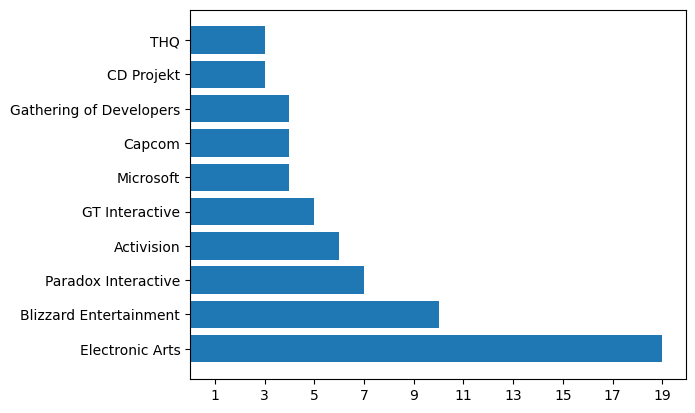

In [6]:
plt.barh(df_pub_dups['Publisher'].head(10), df_pub_dups['Total'].head(10))
plt.xticks(np.arange(1, 21, 2))
plt.show()

## Which developer developed most of the games?

In [7]:
df_dev_dups = pd.DataFrame(df.pivot_table(columns=['Developer'], aggfunc='size'), columns=['Total'])
df_dev_dups = df_dev_dups.sort_values('Total', ascending=False).reset_index()
df_dev_dups

,Developer,Total
0,Blizzard Entertainment,10
1,Maxis,6
2,Paradox Development Studio,5
3,id Software,4
4,Westwood Studios,4
...,...,...
104,Introversion Software,1
105,Infocom,1
106,Heuristic Park,1
107,Gray Matter Interactive,1


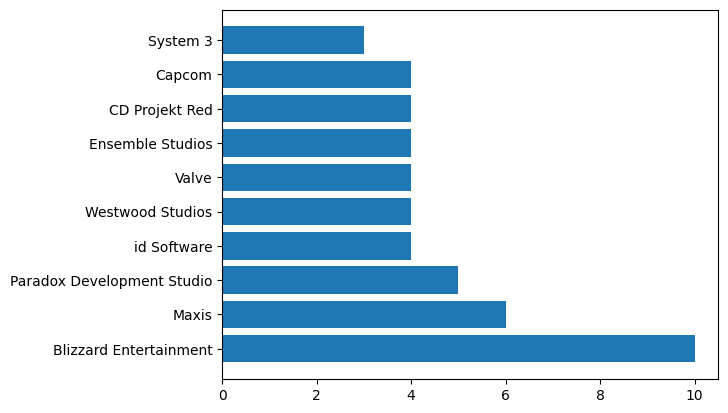

In [8]:
plt.barh(df_dev_dups['Developer'].head(10), df_dev_dups['Total'].head(10))
plt.show()

## Which series is the most sales?

In [9]:
df_sales = df[['Series', 'Sales']]
df_sales

,Series,Sales
0,NaN,42.0
1,Minecraft,33.0
2,Diablo,20.0
3,NaN,20.0
4,NaN,17.2
...,...,...
172,NaN,1.0
173,Wing Commander,1.0
174,Zoo Tycoon,1.0
175,StarCraft,1.0


In [10]:
# Merge duplicated rows
df_sales = df_sales.groupby(['Series']).sum().sort_values('Sales', ascending=False).reset_index()
df_sales.head(10)

,Series,Sales
0,Minecraft,33.0
1,Diablo,26.0
2,The Sims,24.0
3,Half-Life,21.0
4,StarCraft,21.0
5,Warcraft,19.0
6,The Witcher,16.0
7,RollerCoaster Tycoon,14.0
8,Civilization,14.0
9,Guild Wars,11.0


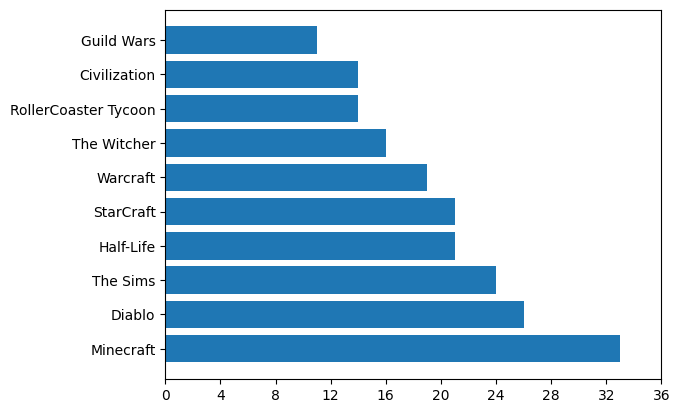

In [11]:
plt.barh(df_sales['Series'].head(10), df_sales['Sales'].head(10))
plt.xticks(np.arange(0, 37, 4))
plt.show()

## Which series have the most games?

In [12]:
df_series_dups = pd.DataFrame(df.pivot_table(columns=['Series'], aggfunc='size'), columns=['Total'])
df_series_dups = df_series_dups.sort_values('Total', ascending=False).reset_index()
df_series_dups.head(10)

,Series,Total
0,StarCraft,6
1,Command & Conquer,5
2,Age of Empires,4
3,Civilization,4
4,Dark Souls,3
5,SimCity,3
6,Resident Evil,3
7,Warcraft,3
8,The Witcher,3
9,The Sims,3


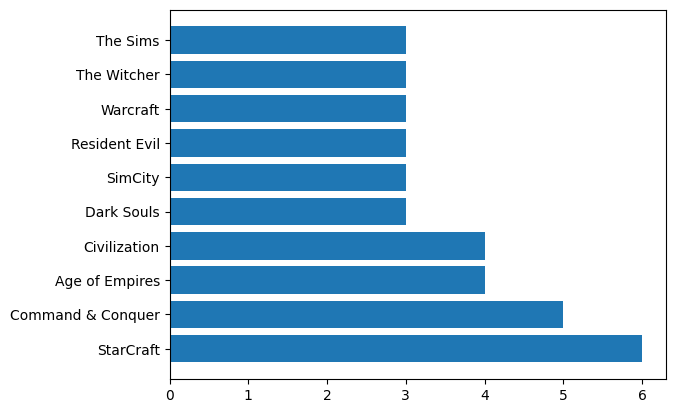

In [13]:
plt.barh(df_series_dups['Series'].head(10), df_series_dups['Total'].head(10))
plt.show()